$$
\newcommand{\fudm}[2]{\frac{\mathrm{D} #1}{\mathrm{D} #2}}
\newcommand{\pad}[2]{\frac{\partial #1}{\partial #2}}
\newcommand{\ppad}[2]{\frac{\partial^2 #1}{\partial #2^2}}
\newcommand{\ppadd}[3]{\frac{\partial^2 #1}{\partial #2 \partial #3}}
\newcommand{\nnabla}{\nabla^2}
\newcommand{\eps}{\epsilon}
\newcommand{\vdetail}[1]{\vb{#1}=\begin{pmatrix}#1_1\\#1_2\\#1_3\end{pmatrix}}
\newcommand{\vb}[1]{\mathbf{#1}}
\newcommand{\va}[1]{\vec{#1}}
\newcommand{\vc}[1]{\begin{pmatrix}#1_1\\#1_2\end{pmatrix}}
\newcommand{\vd}[1]{\begin{pmatrix}#1_1\\#1_2\\#1_3\end{pmatrix}}
\newcommand{\tb}[1]{\underline{\underline{\mathbf{#1}}}}
\newcommand{\fud}[2]{\frac{\mathrm{d} #1}{\mathrm{d} #2}}
\newcommand{\dd}{\mathrm{d}}
$$

#Ideal Flow & Solutions to the Laplace Equation 
The Laplace equation for the velocity potential is only valid for incompressible and irrotational flows. In mathemtatical language we can write:

1. We assume an irrotational velocity field
$$\nabla \times \vb{u}=0\quad.$$
This is a good approximation if the flow field is far from boundaries and for not too high Reynolds numbers (not turbulent). <p>

2. Because the velocity field is irrotational we can derive the velocity field from a gradient of a scalar field $\phi$. This is named the velocity potential
$$\vb{u}=\nabla \phi\quad .$$ <p>

3. The flow field is solenoid-divergent free-incompressible-source and sink free. All these qualities are synonymous to 
$$\nabla \cdot \vb{u}=0\quad .$$<p>

Then and only then we can apply the Laplace equation 

$$\nabla^2 \phi=0$$ for the velocity potential.

This is a big improvement, first the equation is rather simple, the solution to the whole domain is give by the boundary conditions only, it is linear, and there are lots of possibilities to find analytical solutions besides the numerical solution shown in the last notebook.

##Linearity
A linear superposition of solutions is the weighted sum of their individual solutions, i.e. for $\phi_1$ and $\phi_2$ the linear superposition is

$$\phi_3=a \phi_1 + b \phi_2\quad.$$

Because the Laplace Equation is linear in $\phi$ also the superposition of solutions is a solution to the Laplace equation. Thus if $\phi_1$ and $\phi_2$ are solutions, also $\phi_3$ is a solution. This is a very important statement. It allows to compose a solutions from fundamental solutions by just adding them. This is what we are going to do next.

##Laplace Equation in polar coordinates
Sometimes it is convenient to use a polar coordinate system rather than the cartesian, and sometimes we need to switch between them. Here are the equations for the 
Velocity potential

\begin{eqnarray*}
u_r&=&\pad{\phi}{r}\\
u_\theta&=&\frac{1}{r}\pad{\phi}{\theta}
\end{eqnarray*}

and the Laplace equation

$$\nabla^2\phi=\frac{1}{r}\pad{}{r}\left(r\pad{\phi}{r}\right) + \frac{1}{r^2}\ppad{\phi}{\theta}\quad .$$


##Fundamental solutions
We will find fundamental solutions to the Laplace equations and the combine them to describe more complex flows. 

###Uniform Flow
The velocity potential $\phi=x_1 U$ leads to the velocity field 

$$\vb{u}=\nabla \phi=U \begin{pmatrix}1\\0\end{pmatrix}\quad .$$

This is a uniform flow in the $x_1$-direction. It can be generalized to 

$$\phi=x_1 U \, t_1 + x_2 U \, t_2$$

where $\vb{t}=\vc{t}$ is the unit vector of the tangential direction of the flow and $U$ the magnitude.



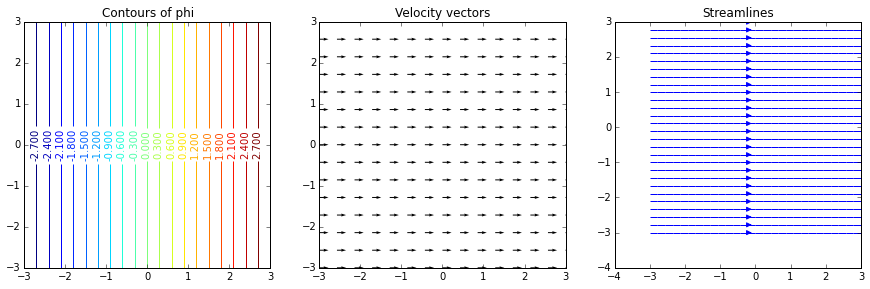

In [21]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#Functioon to plot the contours,velocity vectors, and streamlines
def plot3(xx,yy,ux,uy,phi):
    plt.figure(figsize=(15,5), dpi=100)
    plt.subplot(1,3,1,aspect="equal")
    CS = plt.contour(xx, yy, phi,20)
    plt.clabel(CS, inline=1, fontsize=10)
    plt.title("Contours of phi")
    plt.subplot(1,3,2,aspect="equal")
    plt.title("Velocity vectors")
    plt.quiver(xx,yy,ux,uy,angles="xy")
    plt.subplot(1,3,3,aspect="equal")
    plt.title("Streamlines")
    plt.streamplot(xx,yy,ux,uy);


xstart=ystart=-3 #start of grid in x and y-direction
xend=yend=3 #end of grid in x and y-direction 
steps=15 #number of gridpoints
h=(xend-xstart)/(steps-1.) #gridspacing
y=np.linspace(xstart,ystart,steps)
x=np.linspace(xstart,ystart,steps)
yy,xx=np.mgrid[xstart:xend:steps*1j,ystart:yend:steps*1j] #generate two grids (note the return order yy,xx)

U=1. #velocity
t=np.array([1.,0]) #unit vector of direction
phi=xx*U*t[0]+yy*U*t[1] #velocity potential
uy,ux=np.gradient(phi,h,h) #calculate the gradient of a scalar field (note the return order uy,ux)

plot3(xx,yy,ux,uy,phi);

FYI, the contour function plots lines of a constant level. Please understand each plot above.

###Two-dimensional point source/sink

We had introduced the two dimensional source/sink before, here we write it as a function of $x,y$:

\begin{eqnarray*}
u_r(x,y)&=&\frac{m}{2\pi} \frac{1}{r}\\
u_\theta(x,y)&=&0
\end{eqnarray*}
with $r=\sqrt{(x-x_0)^2+(y-y_0)^2}$. 

This flow field is irrotational and divergent free, except at the position $(x_0,y_0)$.

Now we want to obtain the velocity potential. These are defined as partial derivatives, thus we need to integrate the velocity field with respect to $r$ for $u_r$ and $\theta$ for $u_\theta$.

$$\pad{\phi}{r}=\frac{m}{2\pi} \frac{1}{r} \quad\quad \frac{1}{r}\pad{\phi}{\theta}=0 \rightarrow \pad{\phi}{\theta}=0$$

Integration leads to 
$$\phi=\frac{m}{2\pi}\ln r=\frac{m}{4\pi}\ln\left[(x-x_0)^2+(y-y_0)^2\right]\quad.$$
(Note the $4\pi$!)

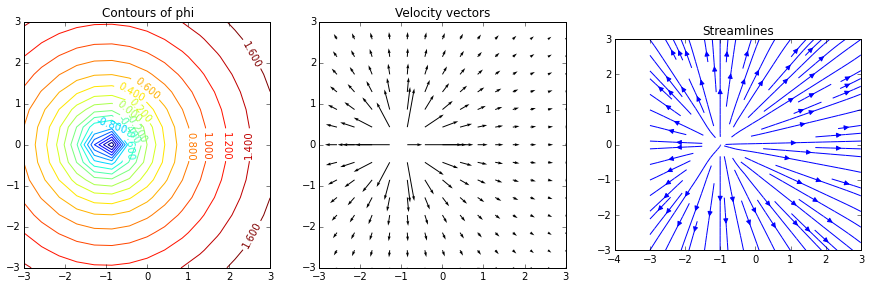

In [22]:
m=7.
x0=[-1,0]
r2=(xx-x0[0])**2+(yy-x0[1])**2
phi=m/4./np.pi*np.log(r2)
uy,ux=np.gradient(phi,h,h)
plot3(xx,yy,ux,uy,phi)

### Superposition Point Source and Uniform flow
Now we abstract the two solutions to the Laplace equation using two functions ```phi_uniform``` and ```phi_source```.

In [5]:
#calculate the potential for a uniform flow, 
#where U is the velocity magitude and t is the unit vector of direction 
def phi_uniform(xx,yy,U,t):
    return xx*U*t[0]+yy*U*t[1]

#calculate the potential for a source/sink flow, where m is the source strength
#and x0 is the position vector
def phi_source(xx,yy,m,x0):
    r2=(xx-x0[0])**2+(yy-x0[1])**2
    return m/4./np.pi*np.log(r2)    

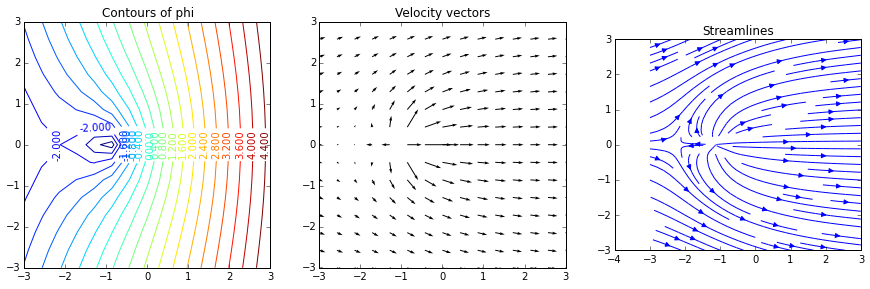

In [23]:
#now we can do a superposition rather simple
phi=phi_uniform(xx,yy,U,t)+phi_source(xx,yy,m,x0)
#calculate the gradient 
uy,ux=np.gradient(phi,h,h)

plot3(xx,yy,ux,uy,phi);

### Dipole
A dipole oriented along the $x-direction$ with strength $d$ is given by the equation for the velocity potential

$$\phi=-\frac{d}{\pi} \frac{x}{r^2}$$


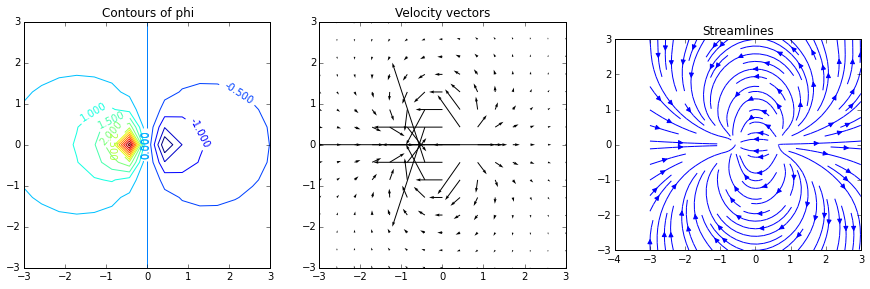

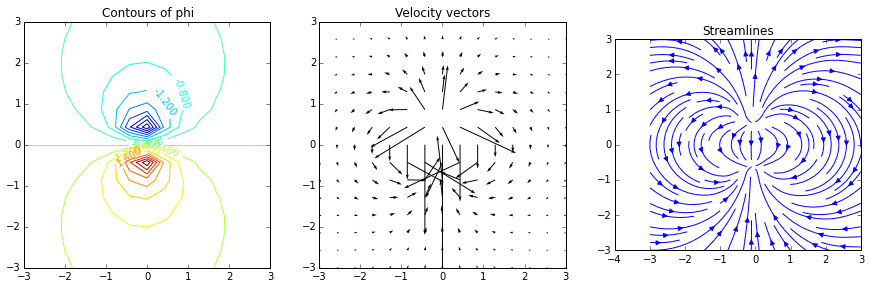

In [24]:
def phi_dipole_x(xx,yy,d,x0):
    r2=(xx-x0[0])**2+(yy-x0[1])**2
    return -d/np.pi*xx/r2

def phi_dipole_y(xx,yy,d,x0):
    r2=(xx-x0[0])**2+(yy-x0[1])**2
    return -d/np.pi*yy/r2

x0=[-.1,0]
d=5;
#dipole in x-direction
#calculate the velocity potential
phi=phi_dipole_x(xx,yy,d,x0)
#calculate the gradient 
uy,ux=np.gradient(phi,h,h)
#and plot the 3 plots
plot3(xx,yy,ux,uy,phi);

#dipole in y-direction
#calculate the velocity potential
phi=phi_dipole_y(xx,yy,d,x0)
#calculate the gradient 
uy,ux=np.gradient(phi,h,h)
#and plot the 3 plots
plot3(xx,yy,ux,uy,phi);


### Superposition Dipole and Uniform flow
Now we abstract the two solutions to the Laplace equation using two functions ```phi_uniform``` and ```phi_dipole_x```. 
The velocity potential of the superpositioned flow field can be written as

$$\phi(r,\theta)=U_x\left(r+\frac{a^2}{r}\right)\cos \theta$$

where $a$ is the cylinder radius, and $U_x$ is the uniform velocity in positive $x$-direction.


The radius of the cylinder is 0.797884560803.


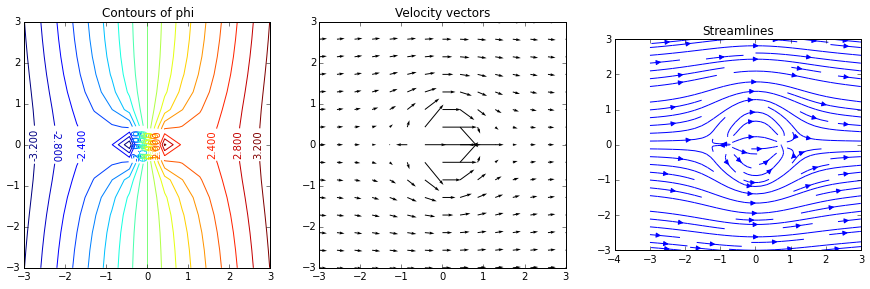

In [35]:
#superposition of uniform flow and dipole
U=1
t=[1.,0]
d=-4
x0=[-0.01,0.]
phi=phi_uniform(xx,yy,U,t)+phi_dipole_x(xx,yy,d,x0)
#calculate the gradient 
uy,ux=np.gradient(phi,h,h)

plot3(xx,yy,ux,uy,phi);

a=np.sqrt(-d/2./np.pi/U)
print "The radius of the cylinder is {0}.".format(a)

### Method of images
If source/sink located as a distance $a$ from a rigid boundary then the velocity potential is identical two that of a superposition of 2 sources/sinks with equal strength, one of which is placed at distance $-a$ from the boundary.

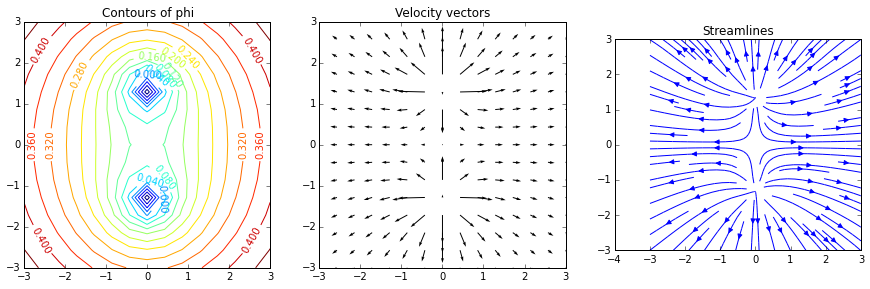

In [38]:
#superposition multiple sources
m=1.
a=1.4

x0=[0.,a]
x1=[0.,-a]
phi=phi_source(xx,yy,m,x0)+phi_source(xx,yy,m,x1)

#calculate the gradient 
uy,ux=np.gradient(phi,h,h)
plot3(xx,yy,ux,uy,phi);

### Soure/Sink between two plates 
For a source between two plates we need two images, one for each boundary. Yet that is not sufficient, each of the images also reflects at the opposing boundary. This leads to an infinite series of sources. Please study below program which calculates this series for a source with strength $m$ positions at the origin and the plates are located at $y=d_p/2$ and $y=-d_p/2$.

/Users/cdohl/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:10: RuntimeWarning: divide by zero encountered in log


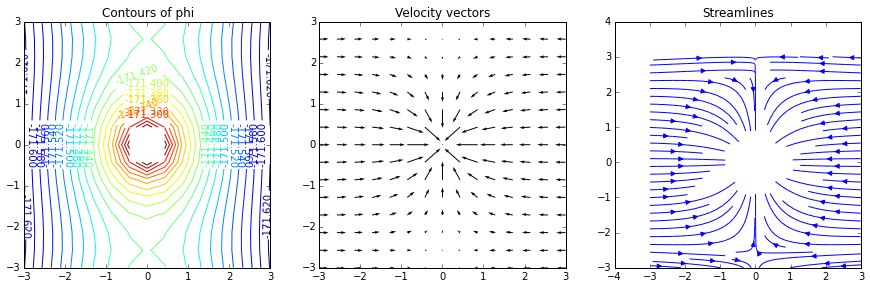

In [73]:
#superposition multiple of "infinte" sources to model sink between two plates
m=-1.     #strength of source
dp=5.5    #separation of plates

phi=phi_source(xx,yy,m,[0,0])+phi_source(xx,yy,m,[0,dp])+phi_source(xx,yy,m,[0,-dp])
pos=0.
for i in range(100): #change the number of iteration to see the convergence
    pos=(.5+(i+1.))*dp
    phi=phi+phi_source(xx,yy,m,[0,pos])+phi_source(xx,yy,m,[0,-pos])
    
#calculate the gradient 
uy,ux=np.gradient(phi,h,h)
plot3(xx,yy,ux,uy,phi);